In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Load the Excel files for attendance, holiday, and permission data
attendance_data = pd.read_excel('data/attendance.xlsx')
holiday_data = pd.read_excel('data/holiday.xlsx')
permission_data = pd.read_excel('data/permission.xlsx')

# Convert Entry and Exit times to datetime so we can calculate work hours
attendance_data['Entry'] = pd.to_datetime(attendance_data['Entry'], format='%H:%M')
attendance_data['Exit'] = pd.to_datetime(attendance_data['Exit'], format='%H:%M')

# Calculate the total work hours (difference between Exit and Entry times)
attendance_data['Work_Hours'] = (attendance_data['Exit'] - attendance_data['Entry']).dt.total_seconds() / 3600

# Calculate Overtime and Delay for each employee
attendance_data['Overtime'] = attendance_data['Work_Hours'] - 8
attendance_data['Overtime'] = attendance_data['Overtime'].apply(lambda x: x if x > 0 else 0)  # Only positive overtime
attendance_data['Delay'] = 8 - attendance_data['Work_Hours']
attendance_data['Delay'] = attendance_data['Delay'].apply(lambda x: x if x > 0 else 0)  # Only positive delay

# Convert permission Start and End times to datetime to calculate permission hours
permission_data['Start'] = pd.to_datetime(permission_data['Start'], format='%H:%M:%S')
permission_data['End'] = pd.to_datetime(permission_data['End'], format='%H:%M:%S')
permission_data['Permission_Hours'] = (permission_data['End'] - permission_data['Start']).dt.total_seconds() / 3600

# Merge attendance data with permission hours (if any)
attendance_with_permission = pd.merge(attendance_data, 
                                      permission_data[['Date', 'Department', 'Employee', 'Permission_Hours']], 
                                      on=['Date', 'Department', 'Employee'], how='left')

# Adjust the work hours by subtracting the permission hours (if they exist)
attendance_with_permission['Adjusted_Work_Hours'] = attendance_with_permission['Work_Hours'] - attendance_with_permission['Permission_Hours'].fillna(0)

# Mark leave days from the holiday data
holiday_data['Start'] = pd.to_datetime(holiday_data['Start'])
holiday_data['End'] = pd.to_datetime(holiday_data['End'])

# Create a list of all leave dates from holiday data (all days between the start and end of leave)
leave_dates = []
for idx, row in holiday_data.iterrows():
    leave_dates += pd.date_range(row['Start'], row['End']).to_list()

# Mark 'On_Leave' if the employee's date is within the leave dates
attendance_with_permission['On_Leave'] = attendance_with_permission['Date'].isin(leave_dates)

# Mark weekends (Saturday and Sunday) for exclusion from leave calculations
attendance_with_permission['Date'] = pd.to_datetime(attendance_with_permission['Date'])
attendance_with_permission['Is_Weekend'] = attendance_with_permission['Date'].dt.weekday >= 5  # Saturday (5) and Sunday (6)

# Filter out leave days that fall on weekends (we don't count leave on non-working days)
attendance_with_permission = attendance_with_permission[~(attendance_with_permission['On_Leave'] & attendance_with_permission['Is_Weekend'])]

# Filter out rows where employees were on leave (leave days should not count in final data)
attendance_with_permission = attendance_with_permission[~attendance_with_permission['On_Leave']]

# Final dataset with the required fields
final_data = attendance_with_permission[['Date', 'Department', 'Employee', 'Adjusted_Work_Hours', 'Overtime', 'Delay',]]

# Save the final dataset to an Excel file
excel_file_path = 'data/data.xlsx'
final_data.to_excel(excel_file_path, index=False)
final_data

,Date,Department,Employee,Adjusted_Work_Hours,Overtime,Delay
0,2024-07-01,IT,Aynur,5.750000,0.000000,2.25
1,2024-07-02,IT,Aynur,9.000000,1.000000,0.00
2,2024-07-03,IT,Aynur,8.166667,0.166667,0.00
3,2024-07-04,IT,Aynur,9.116667,1.116667,0.00
4,2024-07-05,IT,Aynur,9.166667,1.166667,0.00
...,...,...,...,...,...,...
241,2024-09-24,IT,Rasul,8.966667,0.966667,0.00
242,2024-09-25,IT,Rasul,9.650000,1.650000,0.00
243,2024-09-26,IT,Rasul,10.533333,2.533333,0.00
244,2024-09-27,IT,Rasul,8.866667,0.866667,0.00


In [3]:
import pandas as pd

# Load the Excel files for attendance, holiday, and permission data
attendance_data = pd.read_excel('data/attendance.xlsx')
holiday_data = pd.read_excel('data/holiday.xlsx')
permission_data = pd.read_excel('data/permission.xlsx')

# Convert Entry and Exit times to datetime so we can calculate work hours
attendance_data['Entry'] = pd.to_datetime(attendance_data['Entry'], format='%H:%M')
attendance_data['Exit'] = pd.to_datetime(attendance_data['Exit'], format='%H:%M')

# Calculate the total work hours (difference between Exit and Entry times)
attendance_data['Work_Hours'] = (attendance_data['Exit'] - attendance_data['Entry']).dt.total_seconds() / 3600

# Calculate Overtime and Delay for each employee
attendance_data['Overtime'] = attendance_data['Work_Hours'] - 8
attendance_data['Overtime'] = attendance_data['Overtime'].apply(lambda x: x if x > 0 else 0)  # Only positive overtime
attendance_data['Delay'] = 8 - attendance_data['Work_Hours']
attendance_data['Delay'] = attendance_data['Delay'].apply(lambda x: x if x > 0 else 0)  # Only positive delay

# Convert permission Start and End times to datetime to calculate permission hours
permission_data['Start'] = pd.to_datetime(permission_data['Start'], format='%H:%M:%S')
permission_data['End'] = pd.to_datetime(permission_data['End'], format='%H:%M:%S')
permission_data['Permission_Hours'] = (permission_data['End'] - permission_data['Start']).dt.total_seconds() / 3600

# Merge attendance data with permission hours (if any)
attendance_with_permission = pd.merge(attendance_data, 
                                      permission_data[['Date', 'Department', 'Employee', 'Permission_Hours']], 
                                      on=['Date', 'Department', 'Employee'], how='left')

# Adjust the work hours by subtracting the permission hours (if they exist)
attendance_with_permission['Adjusted_Work_Hours'] = attendance_with_permission['Work_Hours'] - attendance_with_permission['Permission_Hours'].fillna(0)

# Mark leave days from the holiday data
holiday_data['Start'] = pd.to_datetime(holiday_data['Start'])
holiday_data['End'] = pd.to_datetime(holiday_data['End'])

# Create a list of all leave dates from holiday data (all days between the start and end of leave)
leave_dates = []
for idx, row in holiday_data.iterrows():
    leave_dates += pd.date_range(row['Start'], row['End']).to_list()

# Mark 'On_Leave' if the employee's date is within the leave dates
attendance_with_permission['On_Leave'] = attendance_with_permission['Date'].isin(leave_dates)

# Mark weekends (Saturday and Sunday) for exclusion from leave calculations
attendance_with_permission['Date'] = pd.to_datetime(attendance_with_permission['Date'])
attendance_with_permission['Is_Weekend'] = attendance_with_permission['Date'].dt.weekday >= 5  # Saturday (5) and Sunday (6)

# Filter out leave days that fall on weekends (we don't count leave on non-working days)
attendance_with_permission = attendance_with_permission[~(attendance_with_permission['On_Leave'] & attendance_with_permission['Is_Weekend'])]

# Extract the month for monthly calculations
attendance_with_permission['Month'] = attendance_with_permission['Date'].dt.to_period('M')

# Group by Employee and Month, summing up Delay and Overtime per month
monthly_data = attendance_with_permission.groupby(['Employee', 'Department', 'Month']).agg({
    'Delay': 'sum',
    'Overtime': 'sum'
}).reset_index()

# Initialize Fine and Bonus columns
monthly_data['Fine'] = 0.0
monthly_data['Bonus'] = 0.0

# Apply fines based on total monthly delay
monthly_data.loc[monthly_data['Delay'] > 3, 'Fine'] = 0.02  # 2% fine for 3-10 hours delay
monthly_data.loc[monthly_data['Delay'] > 10, 'Fine'] = 0.03  # 3% fine for 10-20 hours delay
monthly_data.loc[monthly_data['Delay'] > 20, 'Fine'] = 0.05  # 5% fine for more than 20 hours delay

# Apply bonuses based on total monthly overtime
monthly_data.loc[monthly_data['Overtime'] > 3, 'Bonus'] = 0.02  # 2% bonus for 3-10 hours overtime
monthly_data.loc[monthly_data['Overtime'] > 10, 'Bonus'] = 0.03  # 3% bonus for 10-20 hours overtime
monthly_data.loc[monthly_data['Overtime'] > 20, 'Bonus'] = 0.05  # 5% bonus for more than 20 hours overtime

# Save the final dataset with fines and bonuses to an Excel file
excel_file_path = 'data/monthly_fines_bonuses.xlsx'
monthly_data.to_excel(excel_file_path, index=False)

# Display the final monthly dataset for reference
monthly_data


,Employee,Department,Month,Delay,Overtime,Fine,Bonus
0,Aynur,IT,2024-07,5.616667,18.233333,0.02,0.03
1,Aynur,IT,2024-08,6.283333,25.166667,0.02,0.05
2,Aynur,IT,2024-09,7.266667,18.616667,0.02,0.03
3,Mahir,Marketinq,2024-07,4.066667,16.216667,0.02,0.03
4,Mahir,Marketinq,2024-08,4.550000,18.166667,0.02,0.03
5,Mahir,Marketinq,2024-09,5.300000,26.550000,0.02,0.05
6,Rasim,Marketinq,2024-07,4.966667,23.183333,0.02,0.05
7,Rasim,Marketinq,2024-08,2.450000,17.050000,0.00,0.03
8,Rasim,Marketinq,2024-09,1.500000,15.583333,0.00,0.03
9,Rasul,IT,2024-07,6.450000,23.133333,0.02,0.05


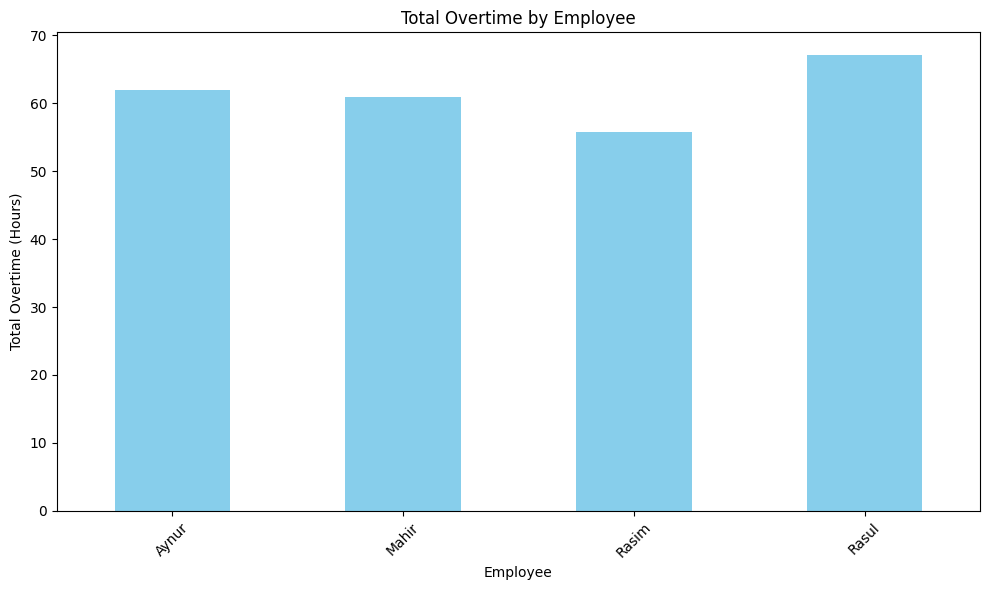

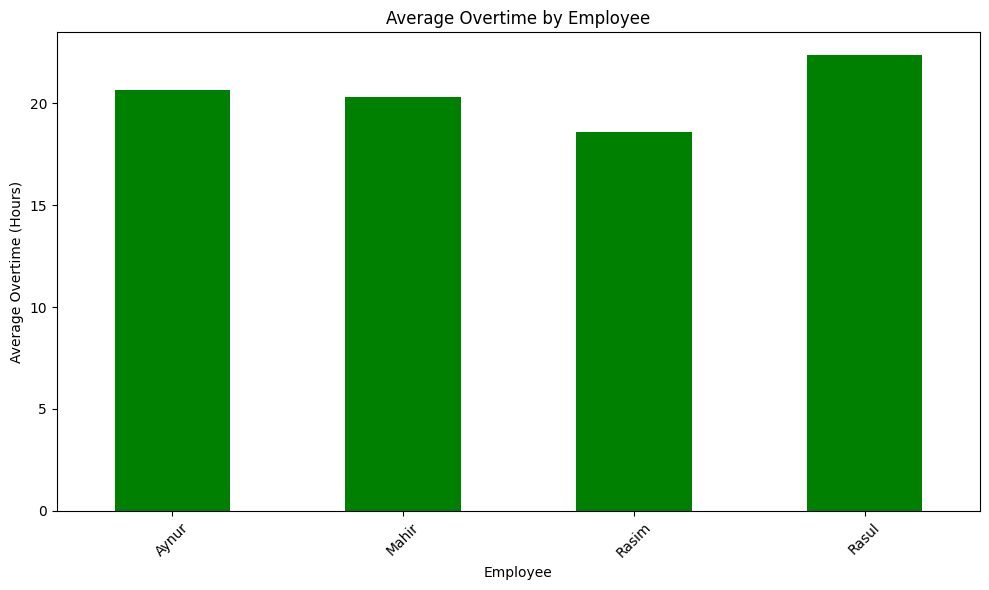

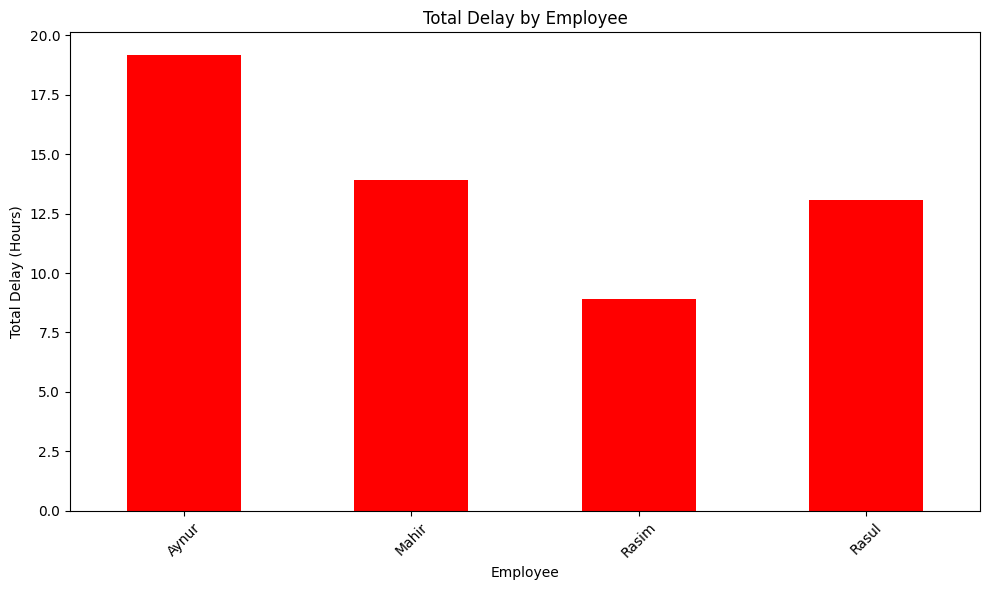

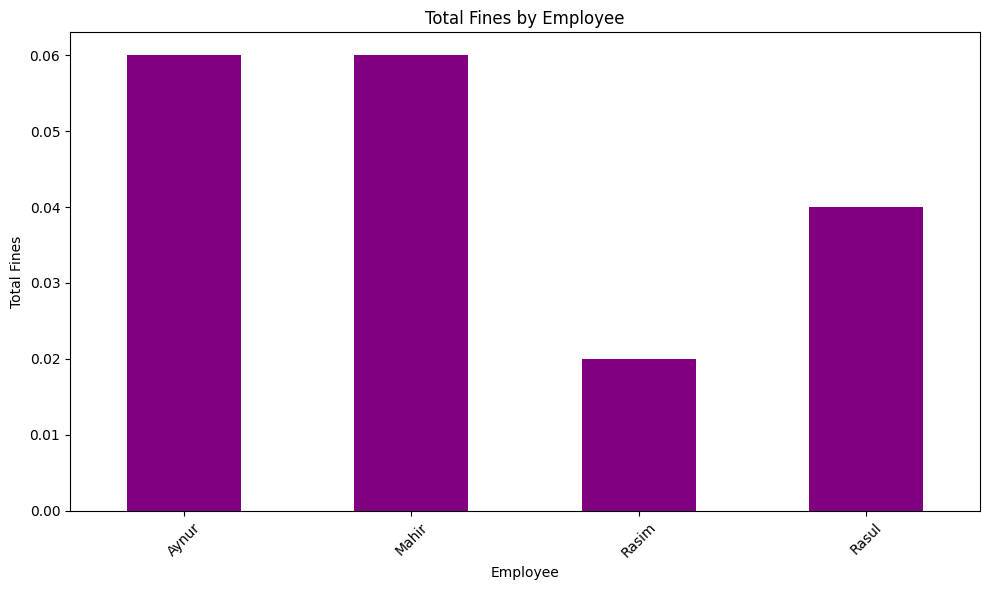

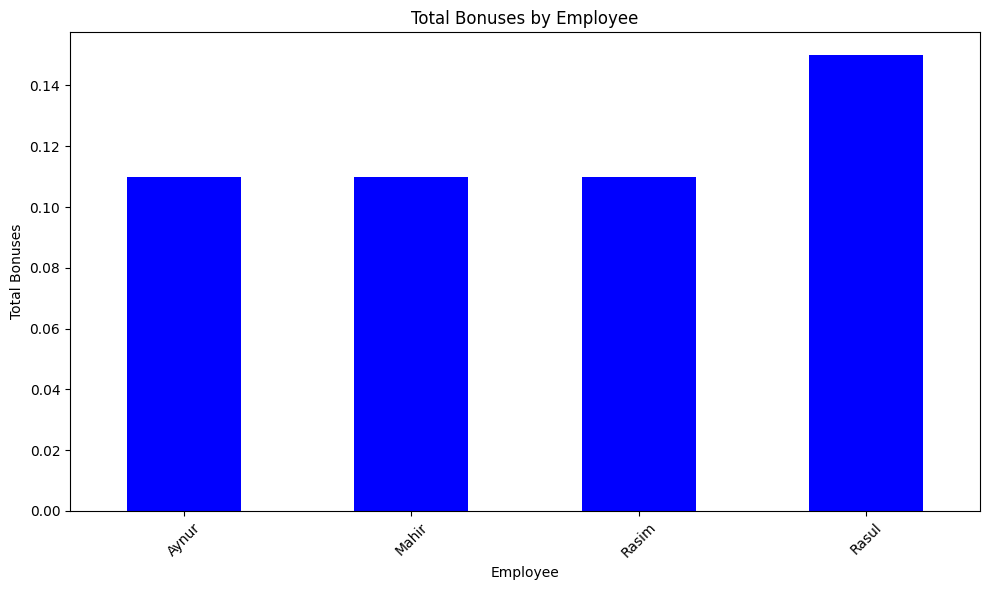

<Figure size 1000x600 with 0 Axes>

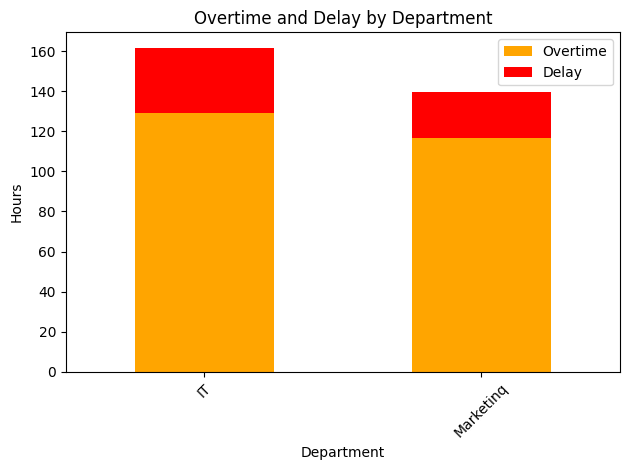

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

In [5]:
# Now that the file has been uploaded, I will load the data and generate the charts.
import matplotlib.pyplot as plt

# Load the uploaded file
file_path = 'data/monthly_fines_bonuses.xlsx'
monthly_data = pd.read_excel(file_path)

# 1. Total Work Hours by Employee (Bar Chart)
plt.figure(figsize=(10, 6))
monthly_data.groupby('Employee')['Overtime'].sum().plot(kind='bar', title="Total Overtime by Employee", color='skyblue')
plt.xlabel('Employee')
plt.ylabel('Total Overtime (Hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Average Overtime by Employee (Bar Chart)
plt.figure(figsize=(10, 6))
monthly_data.groupby('Employee')['Overtime'].mean().plot(kind='bar', title="Average Overtime by Employee", color='green')
plt.xlabel('Employee')
plt.ylabel('Average Overtime (Hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Total Delay by Employee (Bar Chart)
plt.figure(figsize=(10, 6))
monthly_data.groupby('Employee')['Delay'].sum().plot(kind='bar', title="Total Delay by Employee", color='red')
plt.xlabel('Employee')
plt.ylabel('Total Delay (Hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Total Fines by Employee (Bar Chart)
plt.figure(figsize=(10, 6))
monthly_data.groupby('Employee')['Fine'].sum().plot(kind='bar', title="Total Fines by Employee", color='purple')
plt.xlabel('Employee')
plt.ylabel('Total Fines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Total Bonuses by Employee (Bar Chart)
plt.figure(figsize=(10, 6))
monthly_data.groupby('Employee')['Bonus'].sum().plot(kind='bar', title="Total Bonuses by Employee", color='blue')
plt.xlabel('Employee')
plt.ylabel('Total Bonuses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Overtime and Delay by Department (Stacked Bar Chart)
plt.figure(figsize=(10, 6))
department_data = monthly_data.groupby('Department')[['Overtime', 'Delay']].sum()
department_data.plot(kind='bar', stacked=True, title="Overtime and Delay by Department", color=['orange', 'red'])
plt.xlabel('Department')
plt.ylabel('Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Work Hours vs Overtime (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=monthly_data, x='Overtime', y='Delay', hue='Employee', s=100, alpha=0.7)  # Increased marker size and transparency
plt.title('Work Hours vs Overtime')
plt.xlabel('Overtime (Hours)')
plt.ylabel('Delay (Hours)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position for better visibility
plt.tight_layout()
plt.show()


# Display the first few rows of the data for reference
monthly_data.head()
